In [10]:
import numpy as np
from scipy.optimize import fsolve,root
## Function for Orifice 
def mass_critical (P1,T1,A_o,y,Cd,Mw_gas):
    P_1=P1
    T_1=T1
    _A_o=A_o
    C_d=Cd
    _y=y
    R= 8.3145
    _Mw_gas=Mw_gas
    _R=R/_Mw_gas
    m_c= C_d*A_o*P_1*(2/_R/T_1)**0.5*(_y/(_y+1)*(2/(_y+1))**(2/(_y-1)))**0.5
    Cd*A_o*np.sqrt(1.4*rho0*P0*(2/(y+1))**((y+1)/(y-1)))
    return m_c

def stat_P (P0, M, y):
    P_0=P0
    P_stat= P0/(1+(y-1)/2*M**2)**(y/(y-1))
    return P_stat

def stat_T(T0, M, y):
    T_0=T0
    T_stat= T_0/(1+(y-1)/2 *M**2)
    return T_stat

#For forward pass (Things already known prior to calculation is the mdot, M1, P01, T01 i.e upstream parameters)

def main_nozzle_forward(P01, T01, mdot,M, d_orifice, d_upstream_pipe,y, Mw_gas):
    A_o= (np.pi*d_orifice**2/4) #Area of orifice
    A_p= (np.pi*d_upstream_pipe**2/4) #Area of pipe 

    Cd= 0.61 #Coefficient of discharge, It will be less than 1
    #y= 1.4  gamma value changes with the type of gas and conditions
    #g=9.81 #gravitational constant
    R= 8.3145
    _Mw_gas = Mw_gas #since input in grams, if in kg remove this
    _R=R/_Mw_gas
    B = np.sqrt (A_o/A_p) 
    
    P_01=P01
    T_01=T01
    _m=mdot
    
    P_1=stat_P(P_01,M,y) #these equatiions need Mach number
    T_1=stat_T(T_01,M,y)
    rho1= P_1/(_R*T_1)
    
    m_c= mass_critical(P_1, T_1, A_o,y,Cd,Mw_gas)
    print(m_c)
    if _m>m_c:
        r_f = m_c/_m #reduction factor
        print("mass flow rate is greater than critical mass flow rate")
        print ('the output you got is the ratio needed to be multiplied to the original first m assumed') 
        return r_f
    elif _m == m_c:
        print ('Flow is choked')
        P_2 = P_1*(2/(y+1))**(y/(y-1))
        P_02 = P_01 + P_2 - P_1 # need to calculate this? or P_02 is P_2 critical itself?
        return [P_2,P_02]
    else: #no choking
        A=A_o
        _B=B
        
        def equation(P_2):
            return (Cd*(1-(0.333+1.145*(_B**2+0.7*_B**5+ 12*_B**13))*(P_1-P_2)/(y*P_1))*A*(2*rho1*(P_1-P_2))**0.5-_m)

        _P_2= root(equation, P_01-1000)
        #print("Y",(1-(0.333+1.145*(_B**2+0.7*_B**5+ 12*_B**13))*(P_1-_P_2)/(y*P_1)))
        #print ('P2=',_P_2,'error=', equation(_P_2))
        P_02 = P_01 + _P_2['x'] - P_1
        print('no choking',_P_2['x'],P_02)
        #return _P_2,P_02#[0],P_02[0] # we can even get M and P2 from here
    

    



In [15]:
#main_nozzle_forward(P01, T01, mdot,M, d_orifice, d_upstream_pipe,y, Mw_gas)
main_nozzle_forward(24500000, 305, 1.4,0, 0.0066565, 0.006,1.4, 0.034)

P_1 24500000.0
T_1 305.0
A_o 3.480020113514177e-05
1.3039754744809569
mass flow rate is greater than critical mass flow rate
the output you got is the ratio needed to be multiplied to the original first m assumed


0.9314110532006835

In [27]:
Cd = 0.61
orificeD = 0.0066565
A_o = np.pi * orificeD**2 / 4.0
P0 = 24272766.670173936
T0 = 294
MW = 0.0340669
R = 8.3145 / MW
rho0 = P0 / (R*T0)

y = 1.4614
Cd*A_o*np.sqrt(y*rho0*P0*(2/(y+1))**((y+1)/(y-1)))

1.3366740312839756

In [19]:
(2/(y+1))**(y/(y-1))

0.5282817877171742

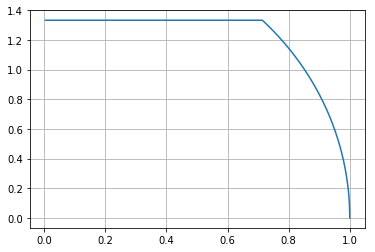

In [53]:
import matplotlib.pyplot as plt
Dp = 0.025
Do = 0.0066565
beta = Do/Dp
K = 0.333+1.145*(beta**2+0.7*beta**5+12*beta**13)
P1 = 24272766.670173936
Cd = 0.61
Ao = np.pi * Do**2 / 4.0
CdA = Cd * Ao
T1 = 295
MW = 0.0340669
R = 8.3145 / MW
rho1 = P1 / R / T1
L = 2 * rho1
P2 = np.linspace(1e5, P1, 1000)
y = 1.46
def mdot(P2):
    if Cd*Ao*np.sqrt(y*rho1*P1*(2/(y+1))**((y+1)/(y-1)))<CdA*(1-K*(P1-P2)/y/P1)*L**0.5*(P1-P2)**0.5:
        return Cd*Ao*np.sqrt(y*rho1*P1*(2/(y+1))**((y+1)/(y-1)))
    else:
        return CdA*(1-K*(P1-P2)/y/P1)*L**0.5*(P1-P2)**0.5
    
_mdot = np.zeros(len(P2))
for i in np.arange(0,len(P2)):
    _mdot[i]=mdot(P2[i])
plt.plot(P2/P1, _mdot)
plt.grid()
plt.show()

In [42]:
len(P2)

1000

In [46]:
_mdot[2]

5.0